# Ο Γερο-πιστός

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

In [39]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

* Σκοπός της [ανάλυσης συστάδων, ή συσταδοποίησης (clustering)](https://en.wikipedia.org/wiki/Cluster_analysis) είναι η αναζήτηση ομάδων (συστάδων) στα δεδομένα μας ώστε τα μέλη μιας ομάδας να είναι όσο πιο ομοιογενή γίνεται, και όσο πιο ετερογενή γίνεται από τα μέλη των άλλων ομάδων.

* Υπάρχουν διάφοροι τρόποι συσταδοποίησης.

* Ίσως ο πιο διαδεδομένος είναι η [συσταδοποίηση k-μέσων (k-means clustering)](https://en.wikipedia.org/wiki/K-means_clustering). 

* Ο αλγόριθμος k-means είναι ένας επαναληπτικός αλγόριθμος, ο οποίος προσπαθεί να βρει το βέλτιστο διαμερισμό σε συστάδες με βάση το *κέντρο* κάθε συστάδας.

* Τα κέντρα των συστάδων ονομάζονται *κεντροειδή* (centroids).

* Η συσταδοποίηση είναι μία μέθοδος μη επιτηρούμενης μάθησης.

* Δεν ξέρουμε εκ των προτέρων ποια είναι η σωστή απάντηση για την ομάδα στην οποία ανήκει κάθε δείγμα.

* Αυτό που πρέπει να επιλέξουμε είναι ο αριθμός των συστάδων.

* Το πρώτο μας παράδειγμα θα είναι μετρήσεις από τον [Γερο-πιστό (Old Faithfull)](https://en.wikipedia.org/wiki/Old_Faithful), έναν θερμοπίδακα στο Εθνικό Πάρκο Yellowstone στο  Wyoming.

* Οι πίδακες νερού που αναβλύζουν από αυτόν εμφανίζονται κάθε 44 ως 125 λεπτά.

* Τα δεδομένα προέρχονται από την εργασία των Azzalini, A. and Bowman, A. W. (1990). A look at some data on the Old Faithful geyser. Applied Statistics, 39, 357–365. doi: 10.2307/2347385, which is available as an R package.

In [40]:
import statsmodels.api as sm

geyser = sm.datasets.get_rdataset(dataname='geyser', package='MASS')
geyser.data

,waiting,duration
0,80,4.016667
1,71,2.150000
2,57,4.000000
3,80,4.000000
4,75,4.000000
...,...,...
294,52,4.083333
295,85,2.066667
296,58,4.000000
297,88,4.000000


* Ένα διάγραμμα θα μας δώσει μια πρώτη εικόνα του χρόνου μεταξύ κάθε πίδακα και της διάρκειας του πίδακα.

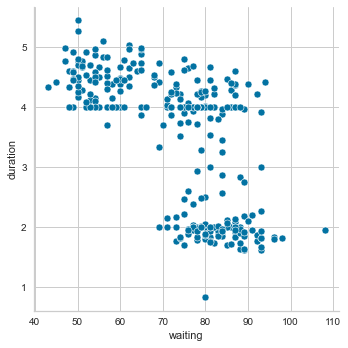

In [41]:
sns.relplot(x='waiting', y='duration', data=geyser.data)

* Ο αλγόριθμος k-means είναι διαθέσιμος μέσω της κλάσης`KMeans` στο scikit-learn.

* Εμείς δίνουμε τον επιθυμητό αριθμό συστάδων.

* Καλούμε τη μέθοδο `fit()`.

* Οι συντεταγμένες των κεντροειδών δίνονται από την ιδιότητα `cluster_centers_`.

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(geyser.data)
kmeans.cluster_centers_

array([[81.31794872,  2.94324786],
       [55.43269231,  4.43125   ]])

* Η ιδιότητα `labels_` μας δίνει την ετικέτα, δηλαδή τη συστάδα στην οποία ανήκει κάθε παρατήρηση.

In [43]:
kmeans.labels_[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

* Εναλλακτικά μπορούμε να εκπαιδεύσουμε το μοντέλο μας και να πάρουμε τις συστάδες των δεδομένων με τη μέθοδο `fit_predict()`.

* Αν θέλουμε στη συνέχεια να πάρουμε τις συστάδες άλλων δεδομένων (πέραν της εκπαίδευσης), χρησιμοποιούμε τη μέθοδο `predict()`.

In [44]:
labels = kmeans.fit_predict(geyser.data)
np.array_equal(labels, kmeans.labels_)

True

* Αν απεικονίσουμε τις δύο συστάδες, διαπιστώνουμε ότι το αποτέλεσμα δεν είναι ιδανικό. 

* Για παράδειγμα, γιατί να έχουμε μια συστάδα που απλώνεται καθέτως, αντί μιας άλλης που να απλώνεται οριζοντίως;

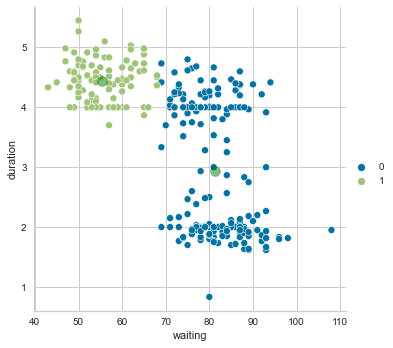

In [45]:
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=geyser.data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='green', edgecolor='black', alpha=0.5, s=100)

* Ας αυξήσουμε τον αριθμό των συστάδων.

* Βλέπουμε ότι τα αποτελέσματα χειροτερεύουν...

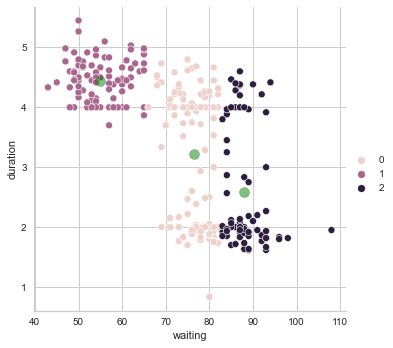

In [46]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(geyser.data)
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=geyser.data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='green', edgecolor='black', s=100, alpha=0.5)

* Ο αλγόριθμος k-means δεν δουλεύει καλά αν τα χαρακτηριστικά των δεδομένων μας έχουν διαφορετική διακύμανση.

* Για να δούμε τι συμβαίνει.

In [47]:
geyser.data.describe()

,waiting,duration
count,299.000000,299.000000
mean,72.314381,3.460814
std,13.890324,1.147904
min,43.000000,0.833333
25%,59.000000,2.000000
50%,76.000000,4.000000
75%,83.000000,4.383333
max,108.000000,5.450000


* Θα χρησιμοποιήσουμε το γνώριμό μας `StandardScaler()` για να εξασφαλίσουμε ότι όλα τα χαρακτηριστικά έχουν την ίδια διακύμανση. 

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(geyser.data)
scaled_geyser = pd.DataFrame(X, index=geyser.data.index, 
                             columns=geyser.data.columns)
scaled_geyser

,waiting,duration
0,0.554235,0.485045
1,-0.094784,-1.143834
2,-1.104370,0.470501
3,0.554235,0.470501
4,0.193669,0.470501
...,...,...
294,-1.464936,0.543219
295,0.914801,-1.216552
296,-1.032257,0.470501
297,1.131141,0.470501


* Για να δούμε τώρα τι παίρνουμε αν ζητήσουμε δύο συστάδες.

<Figure size 576x396 with 0 Axes>

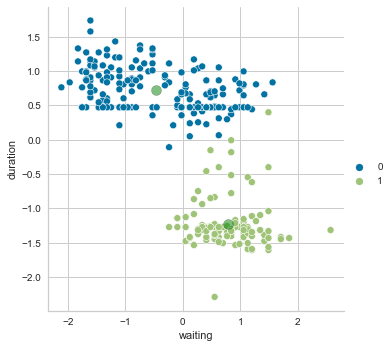

In [49]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(scaled_geyser)
plt.figure()
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=scaled_geyser)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='green', edgecolor='black', s=100, alpha=0.5)

* Και με τρεις συστάδες.

<Figure size 576x396 with 0 Axes>

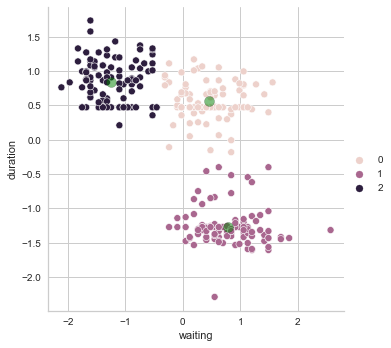

In [50]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_geyser)
plt.figure()
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=scaled_geyser)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='green', edgecolor='black', s=100, alpha=0.5)

In [51]:
kmeans.n_iter_ #to see the number of iterations

5

* Για να βρούμε τον βέλτιστο αριθμό συστάδων μπορούμε να χρησιμοποιήσουμε τη *μέθοδο του αγκώνα* (elbow method).

* Κατασκευάζουμε ένα διάγραμμα με τον αριθμό των συστάδων στον άξονα $x$ και το άθροισμα των τετραγώνων των αποστάσεων κάθε δείγματος από το κεντροειδές της ομάδας του (την *μετρική παραμόρφωσης*, distortion score) στον άξονα $y$.

* Το διάγραμμα θα μοιάζει με ένα μπράτσο, έτσι ώστε η καμπή μας δίνει τον βέλτιστο αριθμό των συστάδων.

* Για την κατασκευή του διαγράμματος θα χρησιμοποιήσουμε τη βιβλιοθήκη [yellowbrick](https://www.scikit-yb.org/en/latest/index.html).

* Εμφανίζει δύο γραμμές, μία με την μετρική παραμόρφωσης και μία με τον χρόνο που χρειάζεται για την εκπαίδευση κάθε μοντέλου.

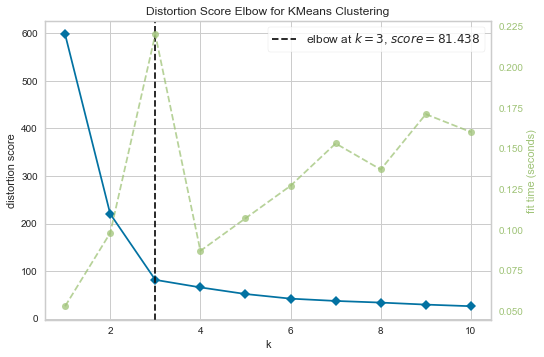

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(scaled_geyser)
#visualizer.elbow_value_ #to take the optimal number of clusters
visualizer.show()

* Υπάρχει και μία άλλη, εναλλακτική μέθοδος, η [ανάλυση σιλουέτας (silhouette analysis)](https://en.wikipedia.org/wiki/Silhouette_(clustering)) που μπορεί να μας βοηθήσει στον εντοπισμό του βέλτιστου αριθμόυ των συστάδων.

* Για κάθε σημείο $i$ της συστάδας $C_{k}$ ορίζουμε:

  $$ a(i)={\frac {1}{|C_{k}|-1}}\sum _{j \in C_{k},i\neq j}d(i,j)$$

  τη μέση απόσταση από τα άλλα σημεία της συστάδας $C_k$, όπου $d(i, j)$ είναι η απόσταση μεταξύ δύο σημείων $i$ και $j$.
  
* Το $a(i)$ μετράει πόσο καλά ταιριάζει το σημείο $i$ στη συστάδα. Όσο μικρότερο είναι, τόσο περισσότερο ταιριάζει στη συστάδα.

* Για κάθε σημείο $i$ της συστάδας $C_{k}$ ορίζουμε επίσης:

  $$ b(i)=\min _{q\neq k}{\frac {1}{|C_{q}|}}\sum _{j\in C_{q}}d(i,j)$$

* Δηλαδή, υπολογίζουμε τη μέση απόσταση από το $i$ στις άλλες συστάδες, και το $b(i)$ είναι η μικρότερη απόσταση, δηλαδή η απόσταση προς την κοντινότερη συστάδα στην οποία *δεν ανήκει*.
  
* Το $b(i)$ είναι λοιπόν η απόσταση προς τη λιγότερο διαφορετική συστάδα, η οποία ονομάζεται *γείτονας συστάδα* του $i$.

* Ορίζουμε τότε την τιμή σιλουέτας του σημείου $i$:

  $$ s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}}, \quad \textrm{αν } |C_{k}| > 1$$

  και:

  $$ s(i)=0 , \quad \textrm{αν } |C_{k}| = 1$$

* Το $s(i)$ κυμαίνεται από το $[-1, 1]$.

* Αν το $s(i)$ είναι κοντά στο $+1$, τότε το σημείο απέχει πολύ από τη γείτονα συστάδα (και άρα και τις άλλες).

* Αν $s(i) = 0$, τότε το σημείο βρίσκεται στο σύνορο με τη γείτονα συστάδα.

* Αν $s(i) < 0$, τότε το σημείο μπορεί να βρίσκεται σε λάθος συστάδα.

* Αφού έχουμε το $s(i)$ για κάθε  $i$, υπολογίζουμε τη *μέση μετρική σιλουέτας* για όλα τα σημεία.

* Επιλέγουμε τον αριθμό των συστάδων που μας δίνει τη μέγιστη μέση μετρική σιλουέτας.

* Μπορούμε να οπτικοποιήσουμε τις μετρικές σιλουέτας απεικονίζοντας τη μετρική για κάθε σημείο, μαζί με τον μέσο όρο

* Έτσι μπορούμε να δούμε πόσα σημεία είναι στη σωστή συστάδα και πόσα όχι.

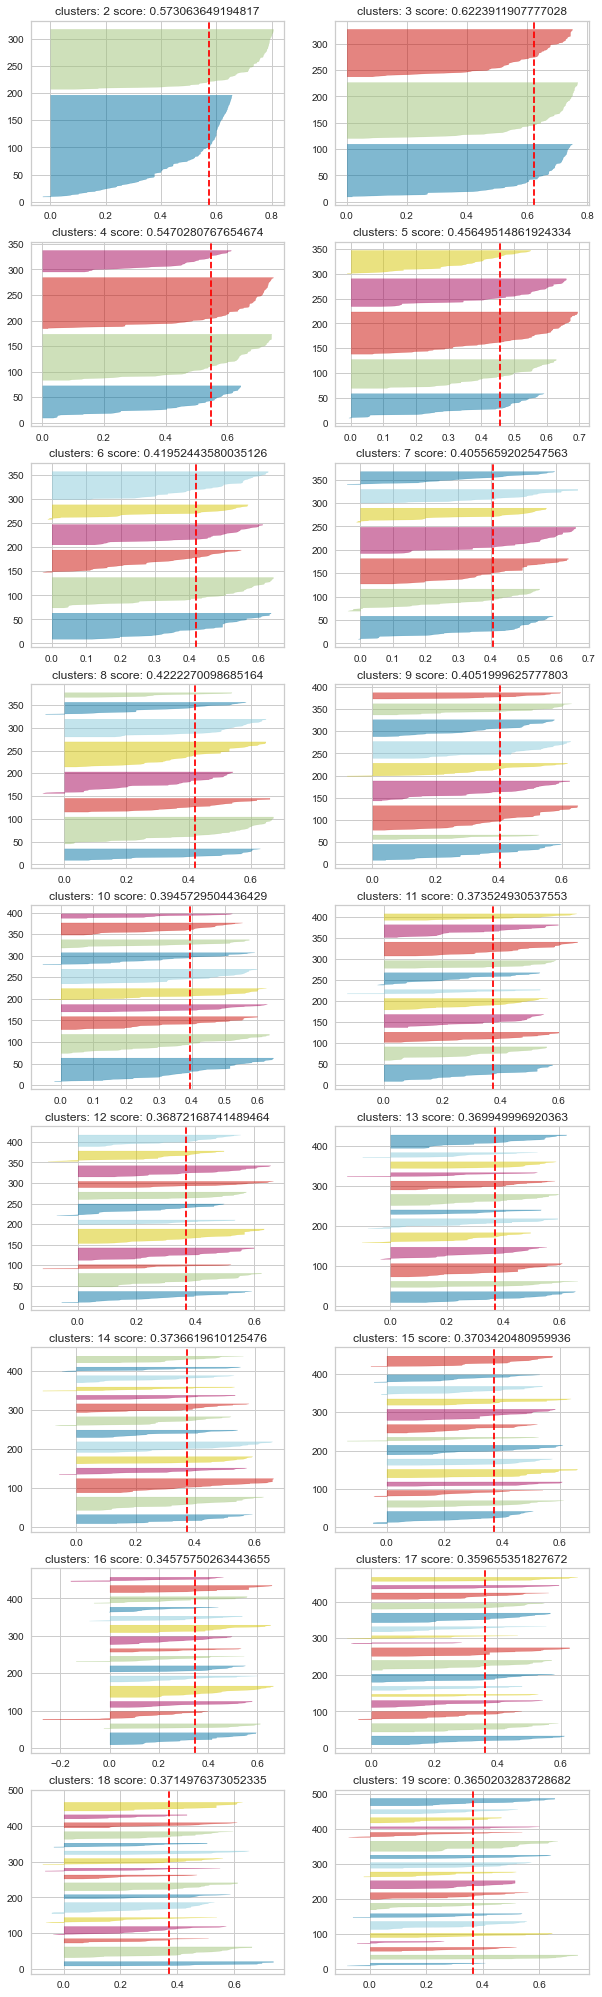

In [53]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize=(2 * 5,  10 * 4))

scores = {}
for n_clusters in range(2, 20):
    plt.subplot(10, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(scaled_geyser)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

* Για να βρούμε το βέλτιστο αριθμό συστάδων, αρκεί να ταξινομήσουμε σε φθίνουσα σειρά τις μετρικές.

In [54]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(3, 0.6223911907777028),
 (2, 0.573063649194817),
 (4, 0.5470280767654674),
 (5, 0.45649514861924334),
 (8, 0.4222270098685164),
 (6, 0.41952443580035126),
 (7, 0.4055659202547563),
 (9, 0.4051999625777803),
 (10, 0.3945729504436429),
 (14, 0.3736619610125476),
 (11, 0.373524930537553),
 (18, 0.3714976373052335),
 (15, 0.3703420480959936),
 (13, 0.369949996920363),
 (12, 0.36872168741489464),
 (19, 0.3650203283728682),
 (17, 0.359655351827672),
 (16, 0.34575750263443655)]

* Το πρόβλημα στη συσταδοποίηση δεν είναι μόνο η εύρεση του βέλτιστου αριθμού συστάδων.

* Είναι και η ερμηνεία των συστάδων που βρίσκουμε.

* Τι σημαίνουν στον πραγματικό κόσμο;

* Αυτό *δεν* μπορεί να μας το λύσει ο αλγόριθμος, μένει πάνω πας.